In [1]:
#library imports added by student
import pandas as pd
import numpy as np
import logging
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import pickle
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Create function for checking missing values which accepts a dataframe as its parameter
def null_values_check(df): 
    #Error handling to prevent abnormal termination of operation
    try:
        #if-else statement for null value check 
        if(df.isnull().values.any() == True):
            #if there are null values present, print a column-wise summary of records with null values
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)

#initialise variable with dataset name
dataset_name = 'chronic_kidney_disease.csv'

#error-handling to prevent abnormal termination of code
try:
    #import and load weather dataset into pandas dataframe
    chronic_kidney_disease_dataframe = pd.read_csv(dataset_name)
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(chronic_kidney_disease_dataframe.shape))
    print('Total number of records in dataset = ' + str(chronic_kidney_disease_dataframe.shape[0]))
    print('Total number of attributes in dataset = ' + str(chronic_kidney_disease_dataframe.shape[1]))
    print('')
    #call function created to check for null values
    null_values_check(chronic_kidney_disease_dataframe)
    #Missing value imputation
    #replace ? to nan values
    chronic_kidney_disease_dataframe = chronic_kidney_disease_dataframe.replace('?', np.nan)
    
    #set the features and the target variables
    target_class = chronic_kidney_disease_dataframe['class']
    print('\nAre there missing values in Target Class? ' + str(target_class.isna().any()))
    feature_classes = chronic_kidney_disease_dataframe.iloc[:, 0:24]
    print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))
    
    #KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))
    
    
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    
    #Encoding target class using label encoding
    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    
    #split the dataset into training and testing data
    train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.65, test_size = 0.35)
    print('\nAfter Pre-processing:')
    print('Size of train dataset: ' + str(train_target.shape[0]))
    print('Size of test dataset: ' + str(test_target.shape[0]))
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.

Are there missing values in Target Class? False

Are there missing values in the Features? 
age       True
bp        True
sg        True
al        True
su        True
rbc      False
pc       False
pcc      False
ba       False
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool

Now, Are there any missing values in Features? age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
p

In [3]:
pd.concat([feature_classes, target_class1], axis=1, sort=False)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.198844,0.264037,0.502114,-0.023156,-0.431146,-0.36489,-0.484322,0.360477,0.263664,-0.369773,...,0.709349,0.361549,0.860785,-1.297907,-1.347925,0.323994,0.511693,0.488252,0.424195,0
1,-2.604457,-1.957875,0.502114,2.292428,-0.431146,-0.36489,-0.484322,0.360477,0.263664,-0.367144,...,0.355191,-0.039800,-1.339575,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195,0
2,0.622584,0.264037,-1.320442,0.748706,2.433610,-0.36489,-0.484322,0.360477,0.263664,3.600419,...,-0.057993,0.294657,-1.339575,0.770471,-1.347925,0.323994,-1.954297,0.488252,-2.357409,0
3,-0.198844,-0.476600,-2.231720,2.292428,-0.431146,-0.36489,2.064742,-2.774104,0.263664,-0.422359,...,0.001033,0.116280,0.310695,-1.297907,0.741881,0.323994,-1.954297,-2.048122,-2.357409,0
4,-0.022824,0.264037,-1.320442,0.748706,-0.431146,-0.36489,-0.484322,0.360477,0.263664,-0.566968,...,0.178112,0.250063,0.606897,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.211870,0.264037,0.502114,-0.795017,-0.431146,-0.36489,-0.484322,0.360477,0.263664,-0.119993,...,0.886428,0.116280,0.733841,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195,1
396,-0.550885,-0.476600,1.413392,-0.795017,-0.431146,-0.36489,-0.484322,0.360477,0.263664,-0.974505,...,1.299613,0.361549,1.283931,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195,1
397,-2.311090,0.264037,0.502114,-0.795017,-0.431146,-0.36489,-0.484322,0.360477,0.263664,-0.645846,...,1.004481,0.093983,0.945414,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195,1
398,-2.017722,-1.217238,1.413392,-0.795017,-0.431146,-0.36489,-0.484322,0.360477,0.263664,-0.461798,...,1.122534,0.227766,1.156987,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195,1


In [4]:
chronic_kidney_disease_dataframe.corr()

C:\Users\amitp\AppData\Local\Temp\ipykernel_7696\1351811069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  chronic_kidney_disease_dataframe.corr()


,rbc,pc,pcc,ba,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
rbc,1.000000,0.377394,-0.087487,-0.155728,-0.146724,-0.064897,-0.174080,-0.136373,-0.134906,-0.093598,-0.157898,-0.195979,-0.104359
pc,0.377394,1.000000,-0.484608,-0.285899,-0.193972,0.050349,-0.150191,-0.285897,-0.186713,-0.169089,-0.270768,-0.345413,-0.255435
pcc,-0.087487,-0.484608,1.000000,0.349981,0.063923,-0.101499,0.122109,0.159899,0.125609,0.150467,0.163390,0.082387,0.152258
ba,-0.155728,-0.285899,0.349981,1.000000,0.050607,-0.084248,0.012914,0.048558,0.037511,0.122086,0.115159,0.102756,0.029195
pcv,-0.146724,-0.193972,0.063923,0.050607,1.000000,0.477796,0.704580,0.299238,0.278321,0.095286,0.317881,0.280582,0.231888
wbcc,-0.064897,0.050349,-0.101499,-0.084248,0.477796,1.000000,0.636382,-0.017183,0.024052,0.005481,-0.014000,0.061990,0.003703
rbcc,-0.174080,-0.150191,0.122109,0.012914,0.704580,0.636382,1.000000,0.207859,0.245472,0.091272,0.221627,0.252920,0.192769
htn,-0.136373,-0.285897,0.159899,0.048558,0.299238,-0.017183,0.207859,1.000000,0.595480,0.332338,0.332591,0.358281,0.334812
dm,-0.134906,-0.186713,0.125609,0.037511,0.278321,0.024052,0.245472,0.595480,1.000000,0.258540,0.303216,0.287090,0.164872
cad,-0.093598,-0.169089,0.150467,0.122086,0.095286,0.005481,0.091272,0.332338,0.258540,1.000000,0.128571,0.144567,0.028578


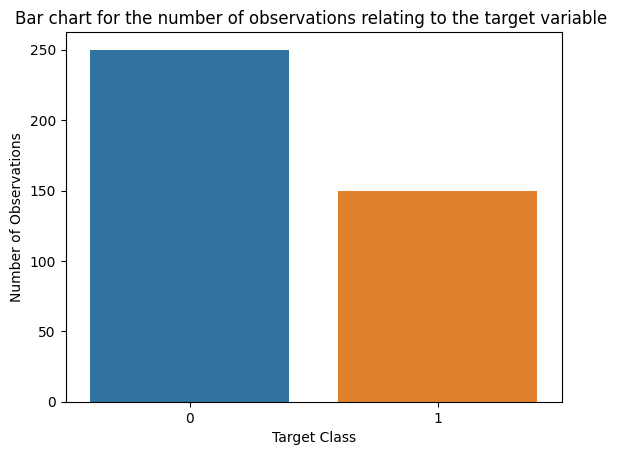

In [5]:
#Target class Visualisatiom

#graph a count plot to check the number of observations relative to the target variable
sns.countplot(x=pd.concat([feature_classes, target_class1], axis=1, sort=False)['class'], label = "Count")
plt.title('Bar chart for the number of observations relating to the target variable ')
plt.xlabel('Target Class')
plt.ylabel('Number of Observations')
plt.show()

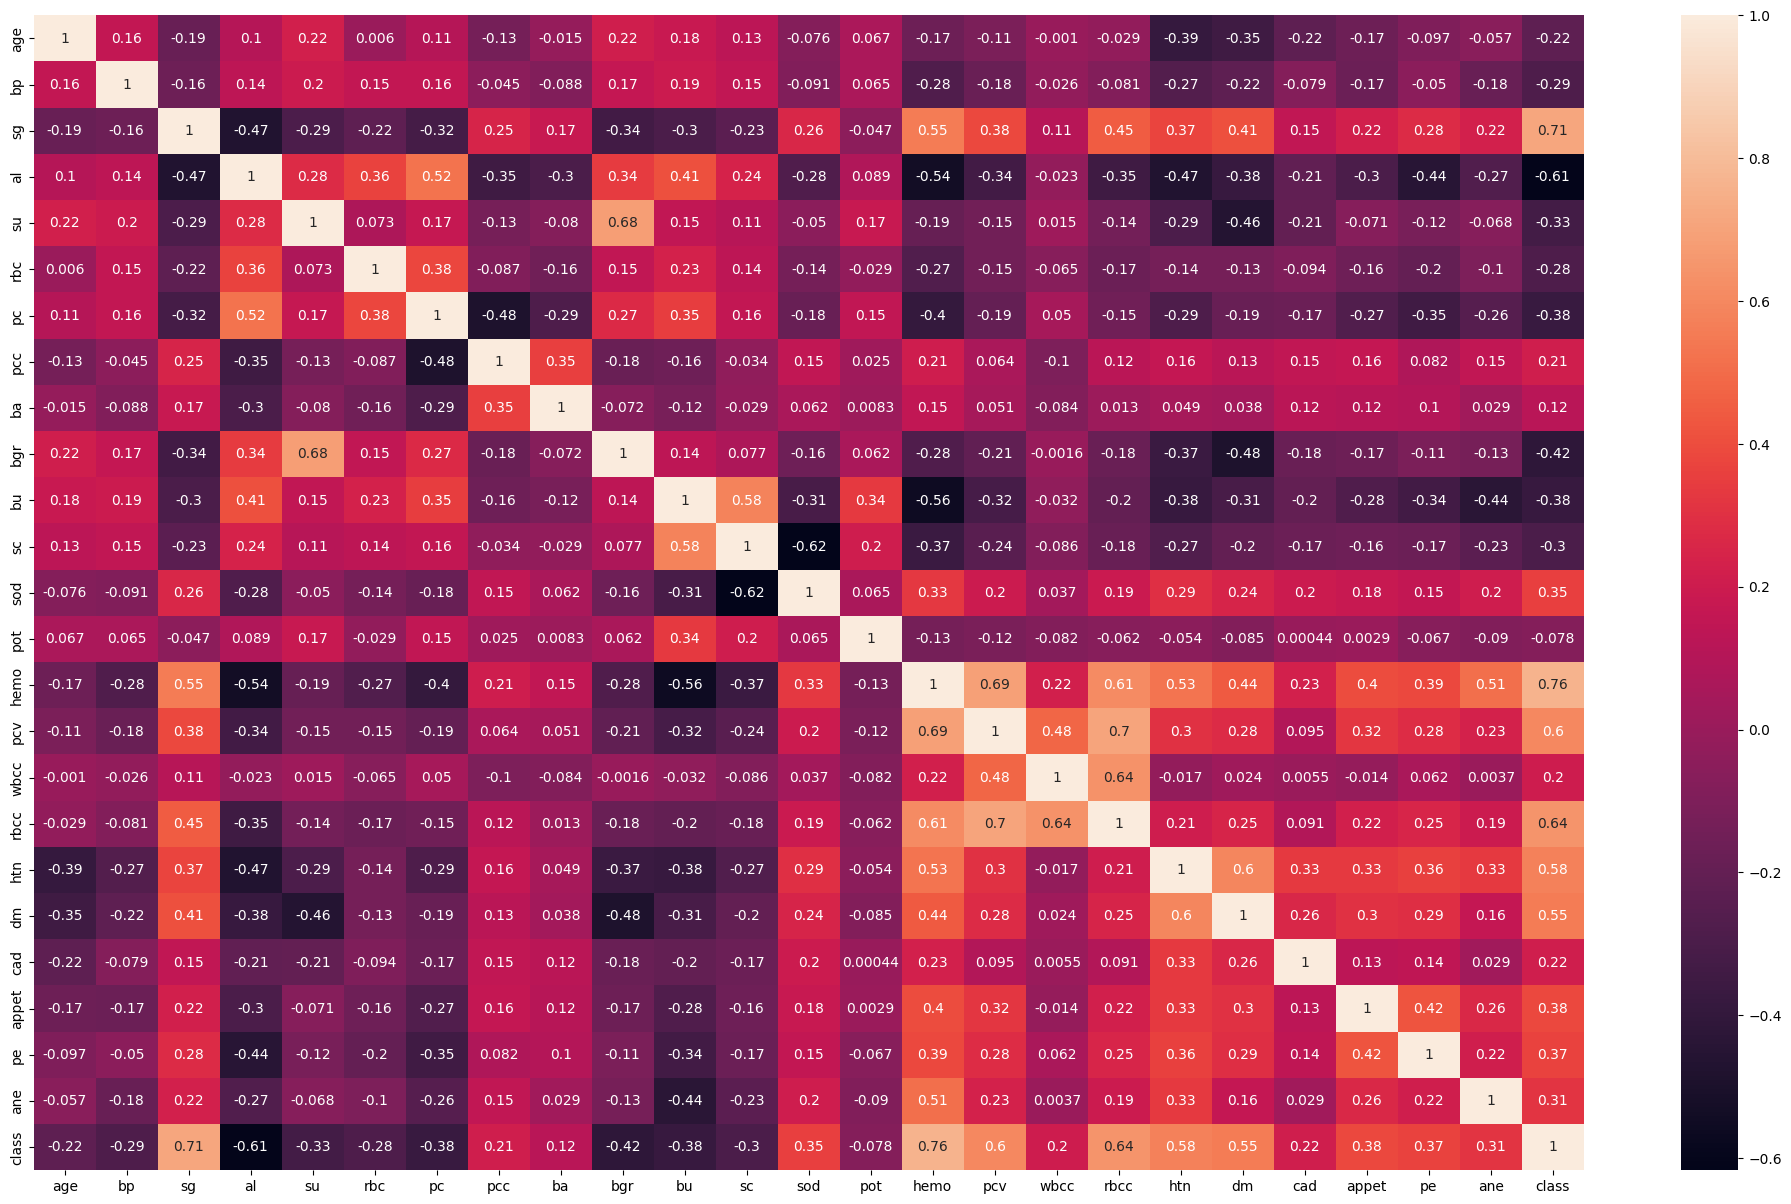

In [6]:
plt.figure(figsize=(25,15)) 
sns.heatmap(pd.concat([feature_classes, target_class1], axis=1, sort=False).corr(), annot=True)
plt.show()


The best parameters are:
 {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=1, gamma='auto', kernel='sigmoid', random_state=20)


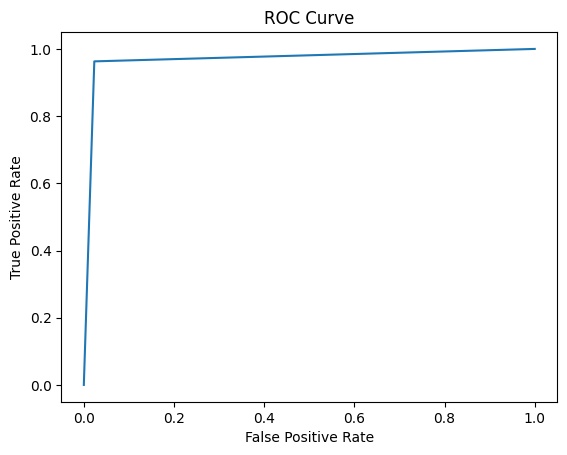

Area Under ROC Curve: 0.9698535745047372

Precision: 0.9629629629629629
Accuracy: 0.9714285714285714
Recall: 0.9629629629629629
F1-score: 0.9629629629629629

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        86
           1       0.96      0.96      0.96        54

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140


Confusion Matrix: 
[[84  2]
 [ 2 52]]


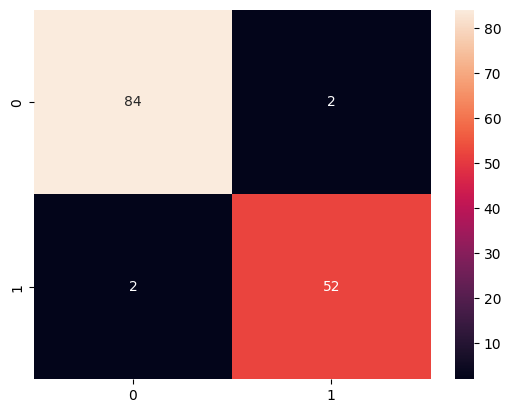

In [7]:
#SVM
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

start_time = time.time()

#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 20)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['auto'], 
                   'shrinking': [True, False]}

#apply exhaustice gridsearch to find the optimal solution
svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

#svm predictions on test features
svm_prediction = svm_grid_search.predict(test_features)

fpr1, tpr1, thresholds = metrics.roc_curve(test_target, svm_prediction, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print('Area Under ROC Curve:', auc)
#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
svm_acc=metrics.accuracy_score(test_target, svm_prediction)
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
svm_rec=metrics.recall_score(test_target, svm_prediction)
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
plt.show()

svm_time=time.time()-start_time

The best parameters are:
 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}

The best model after gridsearch is:
 KNeighborsClassifier(n_jobs=1, n_neighbors=1)


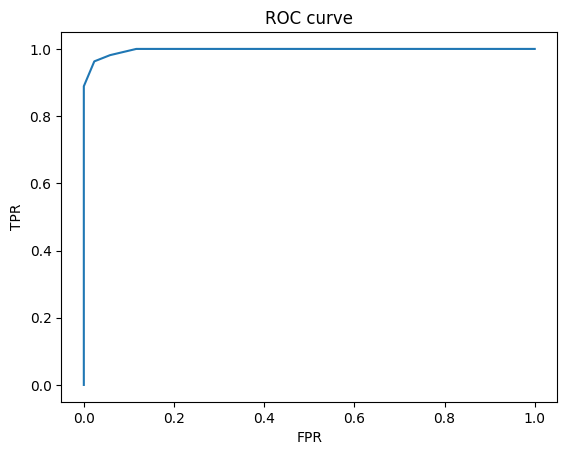

Area Under ROC Curve: 0.9967700258397932

Precision: 0.9137931034482759
Accuracy: 0.9571428571428572
Recall: 0.9814814814814815
F1-score: 0.9464285714285714

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        86
           1       0.91      0.98      0.95        54

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140


Confusion Matrix: 
[[81  5]
 [ 1 53]]


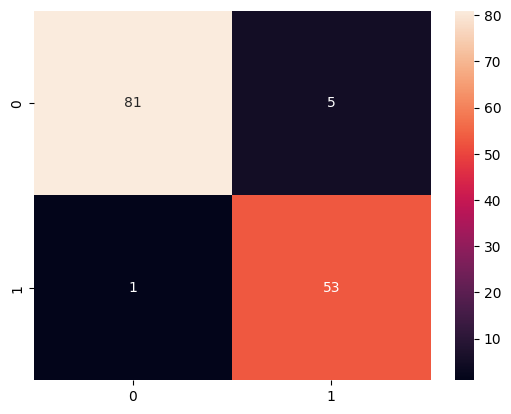

In [8]:
#K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
start_time=time.time()
#initialise the k nearest neighbour Model
k_nearest_neighbour_model = KNeighborsClassifier()

#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}

#apply exhaustice gridsearch to find the optimal solution
knn_grid_search = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
knn_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(knn_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(knn_grid_search.best_estimator_))

#KNN predictions on test features
knn_prediction = knn_grid_search.predict(test_features)

k_nearest_neighbour_model.fit(train_features, train_target)
predictions=k_nearest_neighbour_model.predict_proba(test_features)[:,1]

fpr, tpr, _ = roc_curve(test_target, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
auc = np.trapz(tpr,fpr)
print('Area Under ROC Curve:', auc)

#display KNN classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
knn_acc=metrics.accuracy_score(test_target, knn_prediction)
print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
knn_rec=metrics.recall_score(test_target, knn_prediction)
print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))

#display classification report for KNN
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, knn_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, knn_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, knn_prediction), annot = True)
plt.show()
knn_time=time.time()-start_time

The best parameters are:
 {'criterion': 'entropy', 'max_features': 0.3, 'min_samples_leaf': 2, 'splitter': 'random'}

The best model after gridsearch is:
 DecisionTreeClassifier(criterion='entropy', max_features=0.3,
                       min_samples_leaf=2, random_state=30, splitter='random')


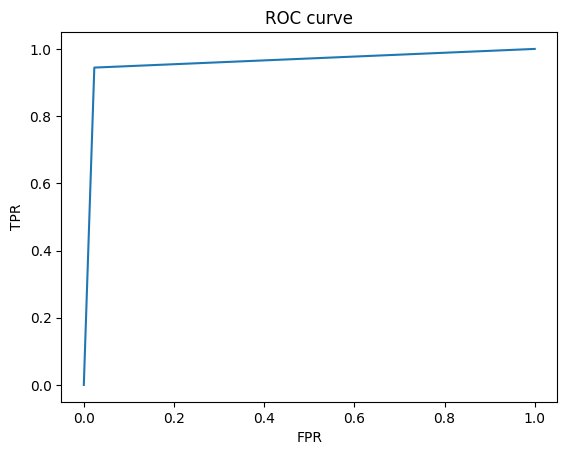

Area Under ROC Curve: 0.9605943152454779

Precision: 0.9591836734693877
Accuracy: 0.9357142857142857
Recall: 0.8703703703703703
F1-score: 0.912621359223301

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        86
           1       0.96      0.87      0.91        54

    accuracy                           0.94       140
   macro avg       0.94      0.92      0.93       140
weighted avg       0.94      0.94      0.94       140


Confusion Matrix: 
[[84  2]
 [ 7 47]]


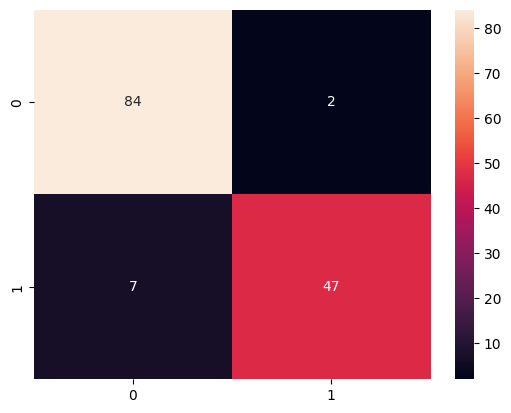

In [9]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
start_time=time.time()
#initialise the decision tree Model
decision_tree_model = DecisionTreeClassifier(random_state = 30)

#defining the decision tree parameters for grid search
dt_parameters_grid = {'criterion': ['gini', 'entropy'], 
                      'splitter': ['best', 'random'], 
                      'min_samples_leaf': [1, 2, 3, 4, 5], 
                      'max_features': [0.3,'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
dt_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(dt_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))

#Decision Tree predictions on test features
dt_prediction = dt_grid_search.predict(test_features)

decision_tree_model.fit(train_features, train_target)
predictions=decision_tree_model.predict_proba(test_features)[:,1]

fpr, tpr, _ = roc_curve(test_target, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
auc = np.trapz(tpr,fpr)
print('Area Under ROC Curve:', auc)


print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
dt_acc=metrics.accuracy_score(test_target, dt_prediction)
print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
dt_rec=metrics.recall_score(test_target, dt_prediction)
print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, dt_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, dt_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, dt_prediction), annot = True)
plt.show()
dt_time=time.time()-start_time

The best parameters are:
 {'criterion': 'entropy', 'max_features': 0.2, 'min_samples_split': 2, 'n_estimators': 60}

The best model after gridsearch is:
 RandomForestClassifier(criterion='entropy', max_features=0.2, n_estimators=60,
                       random_state=10)


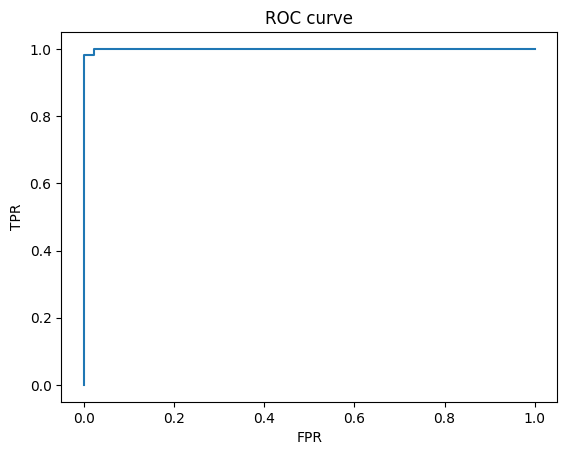

Area Under ROC Curve: 0.9995693367786391

Precision: 1.0
Accuracy: 0.9928571428571429
Recall: 0.9814814814814815
F1-score: 0.9906542056074767

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        86
           1       1.00      0.98      0.99        54

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140


Confusion Matrix: 
[[86  0]
 [ 1 53]]


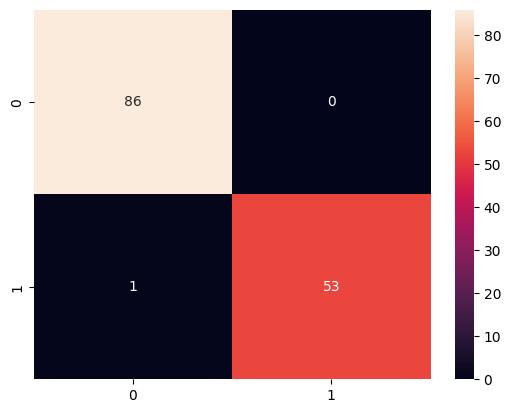

In [10]:
#Random forest

from sklearn.ensemble import RandomForestClassifier

start_time=time.time()
#initialise the random forest Model
random_forest_model = RandomForestClassifier(random_state = 10)

#defining the random forest parameters for grid search
rf_parameters_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 
                      'criterion': ['gini', 'entropy'],
                      'min_samples_split': [1.0, 2, 3, 4, 5], 
                      'max_features': [0.2,'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
rf_grid_search = GridSearchCV(random_forest_model, rf_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
rf_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(rf_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(rf_grid_search.best_estimator_))

#Random Forest predictions on test features
rf_prediction = rf_grid_search.predict(test_features)

random_forest_model.fit(train_features, train_target)
predictions=random_forest_model.predict_proba(test_features)[:,1]

fpr, tpr, _ = roc_curve(test_target, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
auc = np.trapz(tpr,fpr)
print('Area Under ROC Curve:', auc)
#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(test_target, rf_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, rf_prediction)))
rf_acc=metrics.accuracy_score(test_target, rf_prediction)
print('Recall: ' + str(metrics.recall_score(test_target, rf_prediction)))
rf_rec=metrics.recall_score(test_target, rf_prediction)
print('F1-score: ' + str(metrics.f1_score(test_target, rf_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, rf_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, rf_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, rf_prediction), annot = True)
plt.show()
pickle.dump(rf_grid_search, open('kidney.pkl', 'wb'))
rf_time=time.time()-start_time

Accuracies of models [0.9714285714285714, 0.9571428571428572, 0.9357142857142857, 0.9928571428571429]


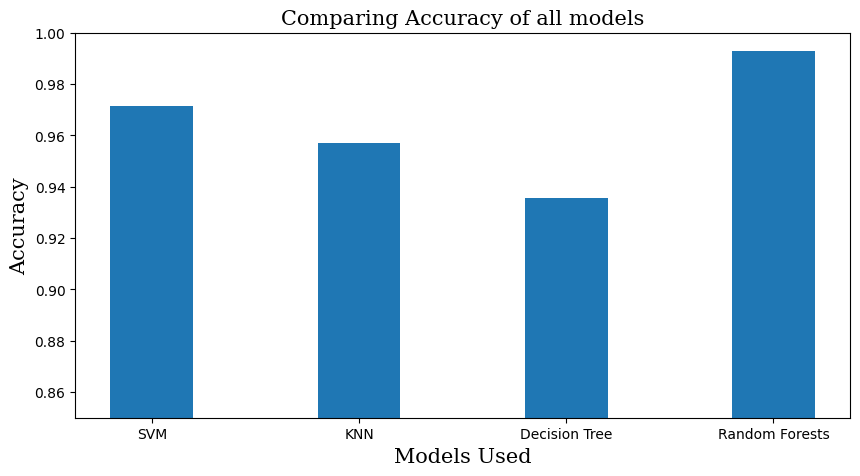

In [11]:
fig = plt.figure(figsize = (10, 5))
xpoints=['SVM','KNN','Decision Tree','Random Forests']
ypoints1 =list([svm_acc,knn_acc,dt_acc,rf_acc])
print("Accuracies of models {}".format(ypoints1))
min_y_lim=0.85
max_y_lim=1

font1 = {'family':'fantasy','color':'black','size':20}
font2 = {'family':'serif','color':'black','size':15}
font3 = {'family':'cursive','color':'black','size':20}

# creating the bar plot
plt.bar(xpoints,ypoints1, width = 0.4)
plt.ylim(min_y_lim, max_y_lim) 
plt.xlabel("Models Used",fontdict=font2)
plt.ylabel("Accuracy",fontdict=font2)
plt.title("Comparing Accuracy of all models",fontdict=font2)
plt.show()# scale starts from 0.85

Recall of models [0.9629629629629629, 0.9814814814814815, 0.8703703703703703, 0.9814814814814815]


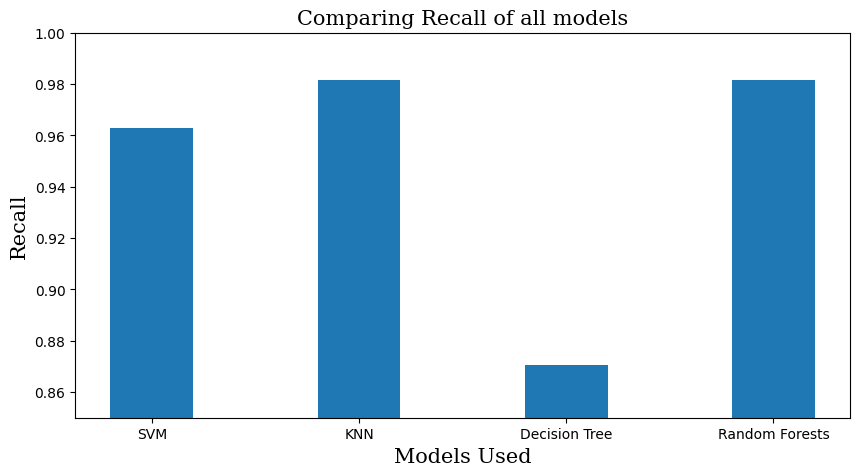

In [12]:
fig = plt.figure(figsize = (10, 5))
xpoints=['SVM','KNN','Decision Tree','Random Forests']
ypoints1 =list([svm_rec,knn_rec,dt_rec,rf_rec])
print("Recall of models {}".format(ypoints1))
min_y_lim=0.85
max_y_lim=1

font1 = {'family':'fantasy','color':'black','size':20}
font2 = {'family':'serif','color':'black','size':15}
font3 = {'family':'cursive','color':'black','size':20}

# creating the bar plot
plt.bar(xpoints,ypoints1, width = 0.4)
plt.ylim(min_y_lim, max_y_lim) 
plt.xlabel("Models Used",fontdict=font2)
plt.ylabel("Recall",fontdict=font2)
plt.title("Comparing Recall of all models",fontdict=font2)
plt.show()# scale starts from 0.85

Time taken to run each of models [1.5412845611572266, 14.369634628295898, 1.2792365550994873, 104.93334889411926]


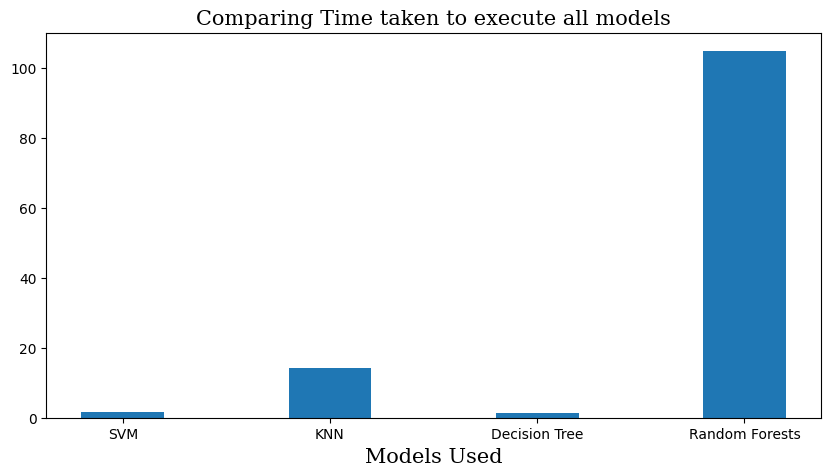

In [13]:
fig = plt.figure(figsize = (10, 5))
xpoints=['SVM','KNN','Decision Tree','Random Forests']
ypoints1 =list([svm_time,knn_time,dt_time,rf_time])
print("Time taken to run each of models {}".format(ypoints1))


font1 = {'family':'fantasy','color':'black','size':20}
font2 = {'family':'serif','color':'black','size':15}
font3 = {'family':'cursive','color':'black','size':20}

# creating the bar plot
plt.bar(xpoints,ypoints1, width = 0.4)
plt.xlabel("Models Used",fontdict=font2)
plt.title("Comparing Time taken to execute all models",fontdict=font2)
plt.show()